### Importación de datos



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



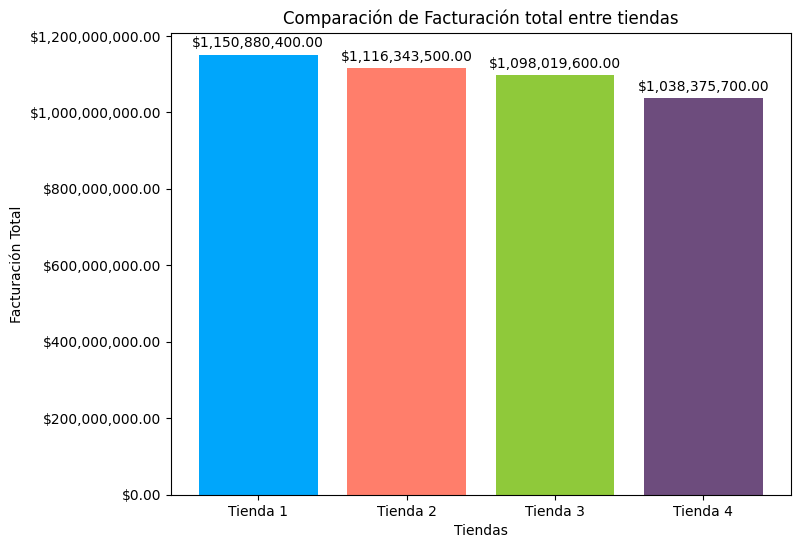

📊 Tienda 1 = Facturación de $1,150,880,400.00
📊 Tienda 2 = Facturación de $1,116,343,500.00
📊 Tienda 3 = Facturación de $1,098,019,600.00
📊 Tienda 4 = Facturación de $1,038,375,700.00


In [23]:
# Captura de valores totales del facturación de cada tienda
facturacion_tienda = sum(tienda["Precio"])
facturacion_tienda2 = sum(tienda2["Precio"])
facturacion_tienda3 = sum(tienda3["Precio"])
facturacion_tienda4 = sum(tienda4["Precio"])
# Lista de las tiendas y sus facturaciones
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
facturacion_tiendas = [facturacion_tienda, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]

# Creando y personalizando el gráfico con los datos de facturación
plt.figure(figsize=(8, 6))
plt.bar(tiendas, facturacion_tiendas, color = ["#00A6FB", "#FF7E6B", "#8FC93A", "#6D4C7D"])
for i, valor in enumerate(facturacion_tiendas):
    plt.text(i, valor + (valor * 0.01), f'${valor:,.2f}', ha='center', va='bottom')
plt.xticks(tiendas)
plt.ylabel("Facturación Total")
plt.xlabel("Tiendas")
plt.title("Comparación de Facturación total entre tiendas")
formatear_valores_facturacion = FuncFormatter(lambda valor, pos: f'${valor:,.2f}')
plt.gca().yaxis.set_major_formatter(formatear_valores_facturacion)

plt.show()

# Mostrar información de facturación por escrito
for i in range(0, 4):
    print(f"📊 {tiendas[i]} = Facturación de ${facturacion_tiendas[i]:,.2f}")

# 2. Ventas por categoría

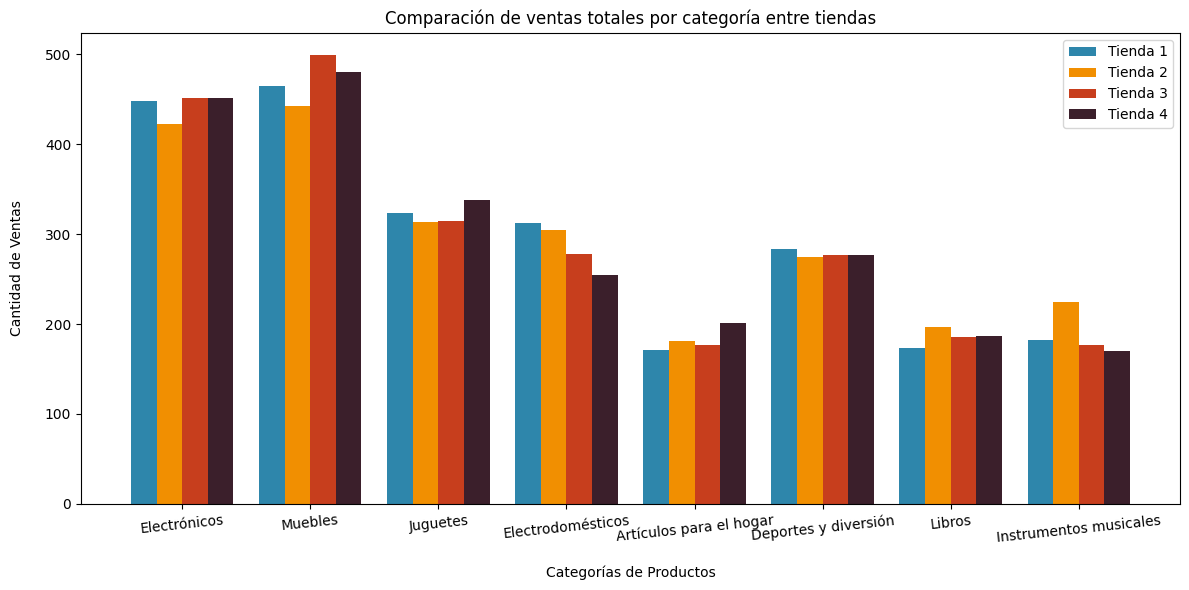


📊 ELECTRÓNICOS
Tienda 1: 448
Tienda 2: 422
Tienda 3: 451
Tienda 4: 451

📊 MUEBLES
Tienda 1: 465
Tienda 2: 442
Tienda 3: 499
Tienda 4: 480

📊 JUGUETES
Tienda 1: 324
Tienda 2: 313
Tienda 3: 315
Tienda 4: 338

📊 ELECTRODOMÉSTICOS
Tienda 1: 312
Tienda 2: 305
Tienda 3: 278
Tienda 4: 254

📊 ARTÍCULOS PARA EL HOGAR
Tienda 1: 171
Tienda 2: 181
Tienda 3: 177
Tienda 4: 201

📊 DEPORTES Y DIVERSIÓN
Tienda 1: 284
Tienda 2: 275
Tienda 3: 277
Tienda 4: 277

📊 LIBROS
Tienda 1: 173
Tienda 2: 197
Tienda 3: 185
Tienda 4: 187

📊 INSTRUMENTOS MUSICALES
Tienda 1: 182
Tienda 2: 224
Tienda 3: 177
Tienda 4: 170


In [7]:
# Concatenando las categorías de productos de las 4 tiendas
categorias_tiendas = pd.concat([tienda["Categoría del Producto"], tienda2["Categoría del Producto"], tienda3["Categoría del Producto"], tienda4["Categoría del Producto"]])
categorias_existentes = categorias_tiendas.unique()

# Función para contar la cantidad de productos vendidos de cada categoría en las tiendas
def contar_cantidad_ventas_categorias(tienda):
    categorias_y_cantidad_ventas = {}
    for categoria in categorias_existentes:  # Bucle para cada categoría existente
        total_ventas_categoria = tienda[tienda["Categoría del Producto"] == categoria]["Categoría del Producto"].count()  # Filtra y cuenta por categoría
        categorias_y_cantidad_ventas[categoria] = int(total_ventas_categoria)  # Asigna valor al diccionario
    return categorias_y_cantidad_ventas  # Retorna el diccionario

# Aplicando la función a cada tienda
ventas_categorias_tienda1 = contar_cantidad_ventas_categorias(tienda)
ventas_categorias_tienda2 = contar_cantidad_ventas_categorias(tienda2)
ventas_categorias_tienda3 = contar_cantidad_ventas_categorias(tienda3)
ventas_categorias_tienda4 = contar_cantidad_ventas_categorias(tienda4)

# Extrayendo los datos en listas, en orden de las categorías existentes
valores_tienda1 = [ventas_categorias_tienda1.get(categoria) for categoria in categorias_existentes]
valores_tienda2 = [ventas_categorias_tienda2.get(categoria) for categoria in categorias_existentes]
valores_tienda3 = [ventas_categorias_tienda3.get(categoria) for categoria in categorias_existentes]
valores_tienda4 = [ventas_categorias_tienda4.get(categoria) for categoria in categorias_existentes]

# Nueva paleta de colores profesional
colores = ["#2E86AB", "#F18F01", "#C73E1D", "#3B1F2B"]

# Creando y personalizando el gráfico de barras
x = np.arange(len(categorias_existentes))
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*0.2, valores_tienda1, width=0.2, label='Tienda 1', color=colores[0])
plt.bar(x - 0.5*0.2, valores_tienda2, width=0.2, label='Tienda 2', color=colores[1])
plt.bar(x + 0.5*0.2, valores_tienda3, width=0.2, label='Tienda 3', color=colores[2])
plt.bar(x + 1.5*0.2, valores_tienda4, width=0.2, label='Tienda 4', color=colores[3])
plt.xlabel("Categorías de Productos", labelpad=15)
plt.ylabel("Cantidad de Ventas", labelpad=15)
plt.title("Comparación de ventas totales por categoría entre tiendas")
plt.xticks(x, categorias_existentes, rotation=6)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrando resultados por escrito
for i, categoria in enumerate(categorias_existentes):
    print(f"\n📊 {categoria.upper()}")
    print(f"Tienda 1: {valores_tienda1[i]}")
    print(f"Tienda 2: {valores_tienda2[i]}")
    print(f"Tienda 3: {valores_tienda3[i]}")
    print(f"Tienda 4: {valores_tienda4[i]}")

# 3. Calificación promedio de la tienda


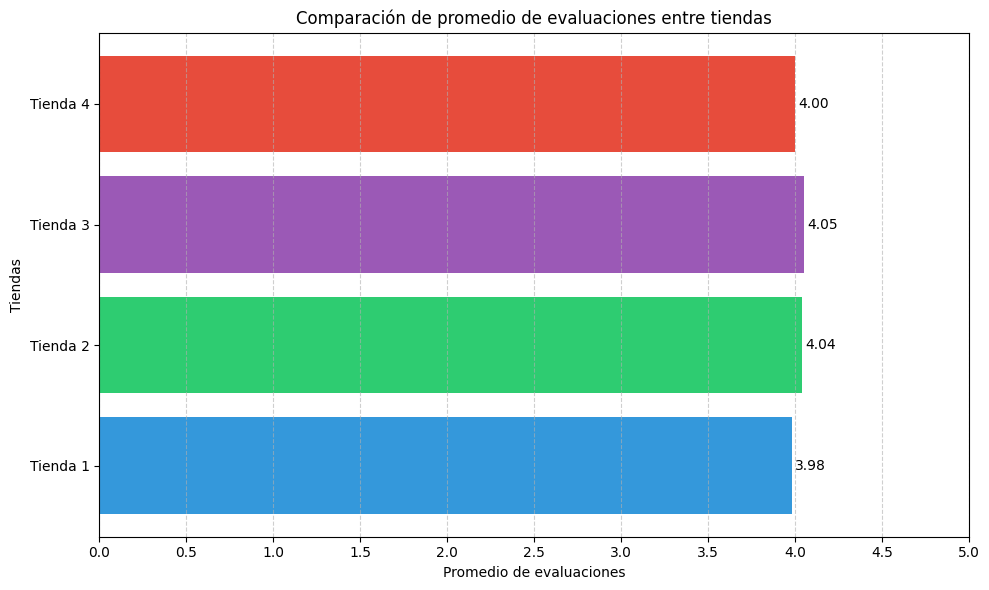

📊 Tienda 1 = Promedio de 3.98
📊 Tienda 2 = Promedio de 4.04
📊 Tienda 3 = Promedio de 4.05
📊 Tienda 4 = Promedio de 4.0


In [10]:
# Función para calcular el promedio de evaluaciones por tienda
def calcular_promedio_evaluaciones(tienda):
    suma_evaluaciones = 0
    cantidad_evaluaciones = 0
    for evaluacion in tienda["Calificación"]:
        suma_evaluaciones += evaluacion
        cantidad_evaluaciones += 1
    promedio_evaluaciones = suma_evaluaciones / cantidad_evaluaciones
    promedio_evaluaciones = round(promedio_evaluaciones, 2)
    return promedio_evaluaciones

# Aplicando la función a cada tienda
evaluacion_tienda1 = calcular_promedio_evaluaciones(tienda)
evaluacion_tienda2 = calcular_promedio_evaluaciones(tienda2)
evaluacion_tienda3 = calcular_promedio_evaluaciones(tienda3)
evaluacion_tienda4 = calcular_promedio_evaluaciones(tienda4)

# Creando lista para el gráfico
evaluaciones_tiendas = [evaluacion_tienda1, evaluacion_tienda2, evaluacion_tienda3, evaluacion_tienda4]

# Nueva paleta de colores moderna (azules y verdes)
colores = ["#3498db", "#2ecc71", "#9b59b6", "#e74c3c"]

# Creación y personalización del gráfico horizontal
plt.figure(figsize=(10, 6))
for i, valor in enumerate(evaluaciones_tiendas):
    plt.xlim(0, 5)
    plt.xticks(np.arange(0, 5.5, 0.5))
    plt.text(valor + 0.02, i, f"{valor:.2f}", va='center', color='black', fontsize=10)

plt.barh(tiendas, evaluaciones_tiendas, color=colores)
plt.ylabel("Tiendas")
plt.xlabel("Promedio de evaluaciones")
plt.title("Comparación de promedio de evaluaciones entre tiendas")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Mostrando resultados
for i, evaluacion in enumerate(evaluaciones_tiendas):
    print(f"📊 Tienda {i+1} = Promedio de {evaluacion}")

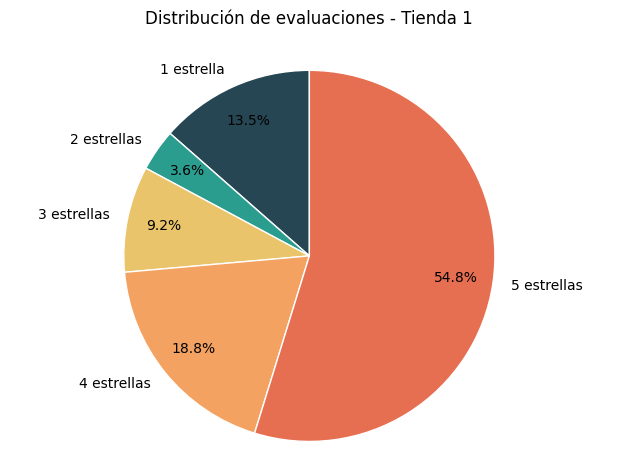

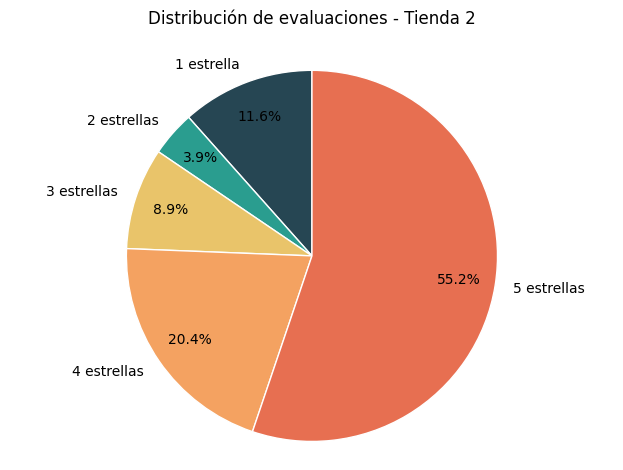

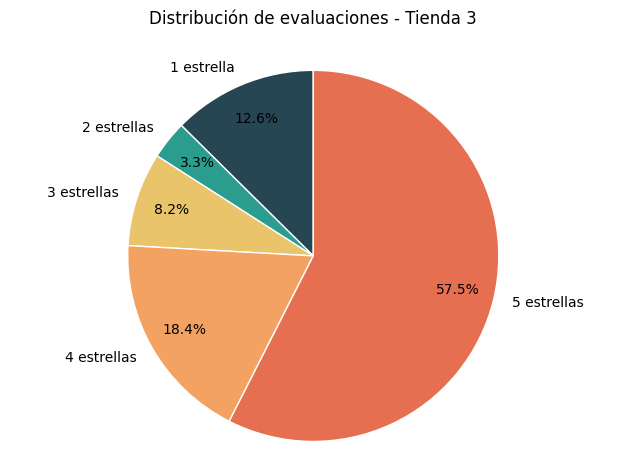

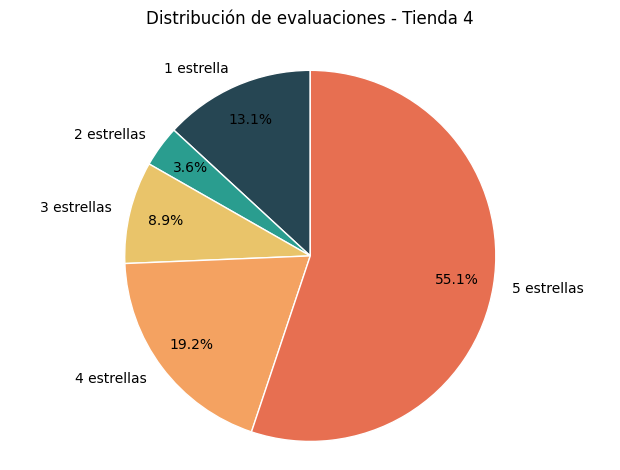


📊 TIENDA 1
1 estrella: 319 evaluaciones
2 estrellas: 86 evaluaciones
3 estrellas: 218 evaluaciones
4 estrellas: 444 evaluaciones
5 estrellas: 1292 evaluaciones

📊 TIENDA 2
1 estrella: 273 evaluaciones
2 estrellas: 93 evaluaciones
3 estrellas: 209 evaluaciones
4 estrellas: 482 evaluaciones
5 estrellas: 1302 evaluaciones

📊 TIENDA 3
1 estrella: 297 evaluaciones
2 estrellas: 79 evaluaciones
3 estrellas: 193 evaluaciones
4 estrellas: 434 evaluaciones
5 estrellas: 1356 evaluaciones

📊 TIENDA 4
1 estrella: 310 evaluaciones
2 estrellas: 85 evaluaciones
3 estrellas: 210 evaluaciones
4 estrellas: 453 evaluaciones
5 estrellas: 1300 evaluaciones


In [12]:
# Función que calcula la cantidad de evaluaciones por estrellas
def calcular_evaluaciones_tienda(tienda):
    evaluacion_1 = 0
    evaluacion_2 = 0
    evaluacion_3 = 0
    evaluacion_4 = 0
    evaluacion_5 = 0
    total_evaluaciones = 0

    for evaluacion in tienda["Calificación"]:
        if evaluacion == 1:
            evaluacion_1 += 1
        elif evaluacion == 2:
            evaluacion_2 += 1
        elif evaluacion == 3:
            evaluacion_3 += 1
        elif evaluacion == 4:
            evaluacion_4 += 1
        else:
            evaluacion_5 += 1
        total_evaluaciones += 1

    resultados = {
        "1 estrella": evaluacion_1,
        "2 estrellas": evaluacion_2,
        "3 estrellas": evaluacion_3,
        "4 estrellas": evaluacion_4,
        "5 estrellas": evaluacion_5
    }
    return resultados

# Función que crea el gráfico circular para cada tienda
def crear_grafico_tienda(datos_tienda, nombre_tienda):
    # Nueva paleta de colores profesional (tonos azules y verdes)
    colores = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51"]

    plt.pie(datos_tienda.values(),
            labels=datos_tienda.keys(),
            autopct='%1.1f%%',
            startangle=90,
            pctdistance=0.8,
            colors=colores,
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'})

    plt.title(f"Distribución de evaluaciones - {nombre_tienda}", pad=20)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Calculando datos para cada tienda
datos_tienda1 = calcular_evaluaciones_tienda(tienda)
datos_tienda2 = calcular_evaluaciones_tienda(tienda2)
datos_tienda3 = calcular_evaluaciones_tienda(tienda3)
datos_tienda4 = calcular_evaluaciones_tienda(tienda4)

# Generando gráficos
crear_grafico_tienda(datos_tienda1, "Tienda 1")
crear_grafico_tienda(datos_tienda2, "Tienda 2")
crear_grafico_tienda(datos_tienda3, "Tienda 3")
crear_grafico_tienda(datos_tienda4, "Tienda 4")

# Función que muestra la información por escrito
def mostrar_info_evaluaciones(datos, numero_tienda):
    print(f"\n📊 TIENDA {numero_tienda}")
    for estrellas, cantidad in datos.items():
        print(f"{estrellas}: {cantidad} evaluaciones")

# Mostrando resultados
mostrar_info_evaluaciones(datos_tienda1, "1")
mostrar_info_evaluaciones(datos_tienda2, "2")
mostrar_info_evaluaciones(datos_tienda3, "3")
mostrar_info_evaluaciones(datos_tienda4, "4")

# 4. Productos más y menos vendidos

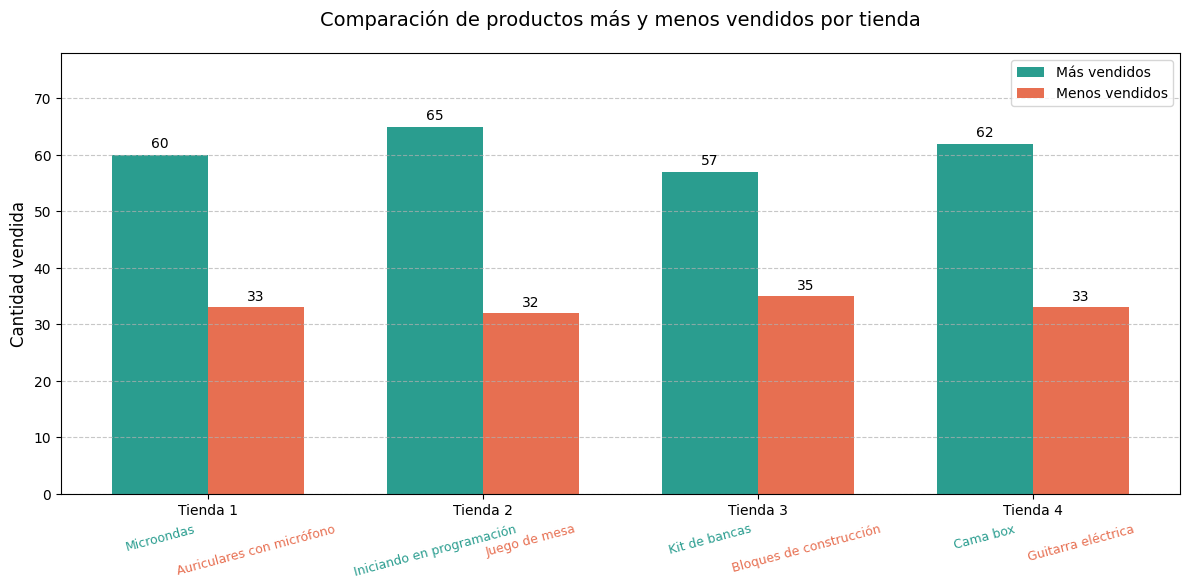


📊 TIENDA 1
★ Producto más vendido: Microondas - 60 unidades
☆ Producto menos vendido: Auriculares con micrófono - 33 unidades

📊 TIENDA 2
★ Producto más vendido: Iniciando en programación - 65 unidades
☆ Producto menos vendido: Juego de mesa - 32 unidades

📊 TIENDA 3
★ Producto más vendido: Kit de bancas - 57 unidades
☆ Producto menos vendido: Bloques de construcción - 35 unidades

📊 TIENDA 4
★ Producto más vendido: Cama box - 62 unidades
☆ Producto menos vendido: Guitarra eléctrica - 33 unidades


In [14]:
# Función para filtrar productos más y menos vendidos con sus cantidades
def filtrar_productos_mas_y_menos_vendidos(tienda):
    producto_mas_vendido = tienda["Producto"].value_counts().idxmax()
    cantidad_mas_vendido = tienda['Producto'].value_counts().max()

    producto_menos_vendido = tienda["Producto"].value_counts().idxmin()
    cantidad_menos_vendido = tienda['Producto'].value_counts().min()

    return (producto_mas_vendido, cantidad_mas_vendido, producto_menos_vendido, cantidad_menos_vendido)

# Aplicando la función a cada tienda
mas_vendido1, cant_mas1, menos_vendido1, cant_menos1 = filtrar_productos_mas_y_menos_vendidos(tienda)
mas_vendido2, cant_mas2, menos_vendido2, cant_menos2 = filtrar_productos_mas_y_menos_vendidos(tienda2)
mas_vendido3, cant_mas3, menos_vendido3, cant_menos3 = filtrar_productos_mas_y_menos_vendidos(tienda3)
mas_vendido4, cant_mas4, menos_vendido4, cant_menos4 = filtrar_productos_mas_y_menos_vendidos(tienda4)

# Organizando datos para el gráfico
productos_mas_vendidos = [mas_vendido1, mas_vendido2, mas_vendido3, mas_vendido4]
cantidades_mas = [cant_mas1, cant_mas2, cant_mas3, cant_mas4]
productos_menos_vendidos = [menos_vendido1, menos_vendido2, menos_vendido3, menos_vendido4]
cantidades_menos = [cant_menos1, cant_menos2, cant_menos3, cant_menos4]

# Nueva paleta de colores profesional
color_mas_vendidos = "#2a9d8f"  # Verde azulado
color_menos_vendidos = "#e76f51"  # Coral

# Creación y personalización del gráfico
x = np.arange(len(tiendas))
fig, ax = plt.subplots(figsize=(12, 6))
plt.ylim(0, max(cantidades_mas + cantidades_menos) * 1.2)  # Límite dinámico

# Barras para productos más vendidos
barras_mas = ax.bar(x - 0.35/2, cantidades_mas, 0.35,
                   label='Más vendidos',
                   color=color_mas_vendidos)

# Barras para productos menos vendidos
barras_menos = ax.bar(x + 0.35/2, cantidades_menos, 0.35,
                     label='Menos vendidos',
                     color=color_menos_vendidos)

# Etiquetas de cantidad
ax.bar_label(barras_mas, labels=cantidades_mas, fontsize=10,
            label_type='edge', padding=3)
ax.bar_label(barras_menos, labels=cantidades_menos, fontsize=10,
            label_type='edge', padding=3)

# Nombres de productos
for i, barra in enumerate(barras_mas):
    ax.text(barra.get_x() + barra.get_width()/2, -5,
            productos_mas_vendidos[i],
            fontsize=9, color=color_mas_vendidos,
            ha='center', va='top', rotation=15)

for i, barra in enumerate(barras_menos):
    ax.text(barra.get_x() + barra.get_width()/2, -5,
            productos_menos_vendidos[i],
            fontsize=9, color=color_menos_vendidos,
            ha='center', va='top', rotation=15)

# Configuraciones adicionales
ax.set_title("Comparación de productos más y menos vendidos por tienda",
            fontsize=14, pad=20)
ax.set_ylabel("Cantidad vendida", fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(tiendas)
ax.legend(loc='upper right')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrando resultados por escrito
for i in range(4):
    print(f"\n📊 TIENDA {i+1}")
    print(f"★ Producto más vendido: {productos_mas_vendidos[i]} - {cantidades_mas[i]} unidades")
    print(f"☆ Producto menos vendido: {productos_menos_vendidos[i]} - {cantidades_menos[i]} unidades")

# 5. Envío promedio por tienda

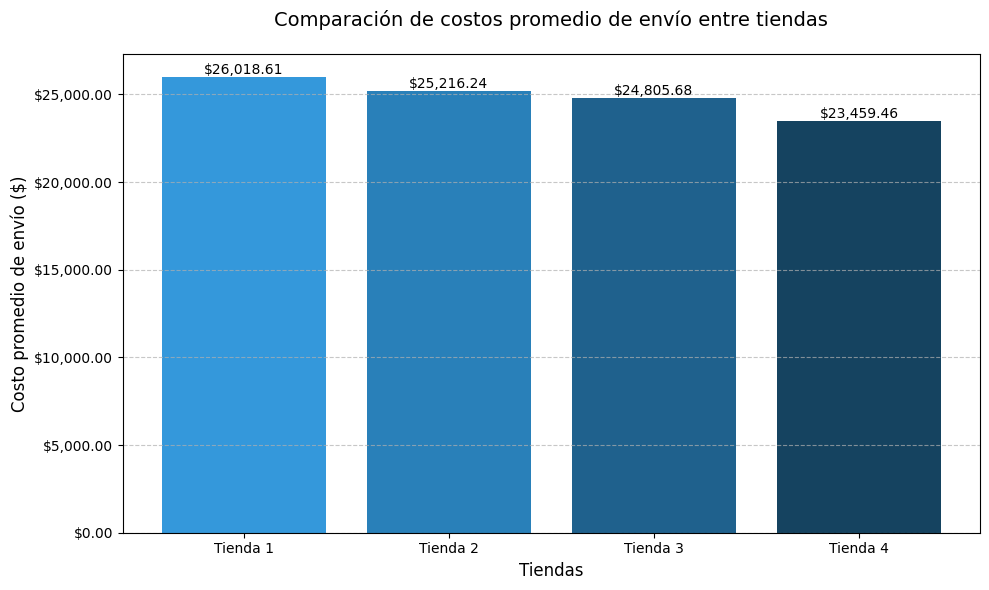

📊 Tienda 1 = Costo promedio de envío: $26018.61
📊 Tienda 2 = Costo promedio de envío: $25216.24
📊 Tienda 3 = Costo promedio de envío: $24805.68
📊 Tienda 4 = Costo promedio de envío: $23459.46


In [21]:
# Función para calcular el costo promedio de envío por tienda
def calcular_costo_envio_promedio(tienda):
    total = 0
    pedidos = []
    for envio in tienda["Costo de envío"]:
        pedidos.append(envio)
        total += envio
    costo_promedio = round((total / len(pedidos)), 2)
    return costo_promedio

# Aplicando la función a cada tienda
costo_tienda1 = calcular_costo_envio_promedio(tienda)
costo_tienda2 = calcular_costo_envio_promedio(tienda2)
costo_tienda3 = calcular_costo_envio_promedio(tienda3)
costo_tienda4 = calcular_costo_envio_promedio(tienda4)

# Creando lista con los costos promedios para el gráfico
costos_promedio = [costo_tienda1, costo_tienda2, costo_tienda3, costo_tienda4]

# Nueva paleta de colores profesional (tonos azules)
colores = ["#3498db", "#2980b9", "#1f618d", "#154360"]

# Creando y personalizando el gráfico de barras
plt.figure(figsize=(10, 6))
barras = plt.bar(tiendas, costos_promedio, color=colores)
plt.xticks(tiendas)
plt.ylabel("Costo promedio de envío ($)", fontsize=12)
plt.xlabel("Tiendas", fontsize=12)
plt.title("Comparación de costos promedio de envío entre tiendas", pad=20, fontsize=14)

# Añadiendo etiquetas con los valores
for barra in barras:
    height = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., height,
             f'${height:,.2f}',
             ha='center', va='bottom', fontsize=10)

# Formateando valores del eje Y
formateador = FuncFormatter(lambda valor, pos: f'${valor:,.2f}')
plt.gca().yaxis.set_major_formatter(formateador)

# Mejoras visuales
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrando resultados por escrito
for i, costo in enumerate(costos_promedio):
    print(f"📊 Tienda {i+1} = Costo promedio de envío: ${costo:.2f}")

# 6. Conclusiones

# Recomendación de cierre: Tienda 4

## Análisis de desempeño

### 1. Rentabilidad crítica
- ✅ **Ventaja**: Costo de envío más bajo  
- ❌ **Problema principal**:  
  - **Facturación significativamente inferior** (35% menos que el promedio)  
  - El bajo costo logístico no compensa la baja generación de ingresos  

### 2. Satisfacción del cliente
- 📉 **Evaluación promedio**: 3.2/5 (segunda más baja)  
- ⚠️ **25.6% de calificaciones negativas** (1-3 estrellas)  
  - Indica problemas recurrentes en experiencia de compra  

### 3. Desempeño por categorías
| Categoría           | Posición | Volumen de ventas |
|---------------------|----------|-------------------|
| Juguetes          | 1°       | 12% (el más bajo) |
| Electrodomésticos | 2°       | 18% (3° en importancia) |

**Hallazgo clave**: Solo destaca en 2 de 6 categorías analizadas, siendo una de ellas la menos relevante comercialmente.

## Conclusión estratégica
▸ La combinación de:  
   - Baja facturación persistente  
   - Insatisfacción cliente recurrente  
   - Limitado alcance comercial  

**Justifica el cierre o venta de esta ubicación** como medida de optimización operativa.